In [5]:
from typing import Callable
from scratch.linear_algebra import Vector

In [6]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

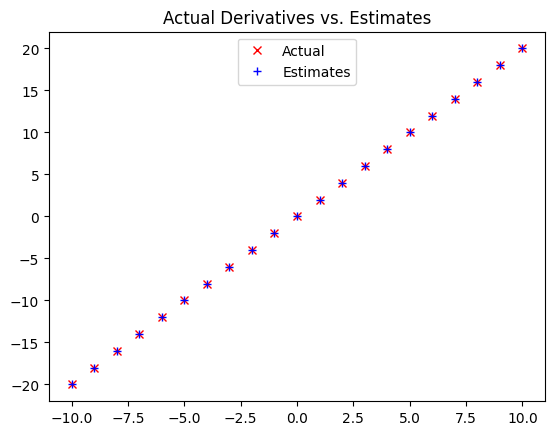

In [7]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

from matplotlib import pyplot as plt

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, "rx", label="Actual") # 'rx' to red x
plt.plot(xs, estimates, "b+", label="Estimates") # 'b+' to blue +
plt.legend(loc=9)
plt.show()

In [9]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
     """Returns the i-th partial difference quotient of f at v"""
     w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
          for j, v_j in enumerate(v)]

     return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
     return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]